In [1]:
import ll  # self-implement tensor computer pkg

In [2]:
import numpy as np

In [3]:
X = np.arange(24, dtype=np.float32).reshape((3, 4, 2))

In [4]:
weights, factors, recErrors = ll.llDecomposition.CP(X, rank=2)

In [5]:
ll.llDecomposition.recTensor(weights, factors)

array([[[ 0.03120422,  0.9645672 ],
        [ 2.0059872 ,  2.992508  ],
        [ 3.9807682 ,  5.020447  ],
        [ 5.955551  ,  7.0483856 ]],

       [[ 8.047189  ,  8.954213  ],
        [10.01729   , 10.983236  ],
        [11.987391  , 13.012256  ],
        [13.957494  , 15.041277  ]],

       [[16.063198  , 16.943878  ],
        [18.028605  , 18.973969  ],
        [19.99401   , 21.004053  ],
        [21.959423  , 23.034143  ]]], dtype=float32)

In [7]:
from scipy.io import loadmat
annots = loadmat('cp_fc_layer.mat')
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [8]:
def innerProduct(t1, t2):
    if list(t1.shape) != list(t2.shape):
        raise ValueError(
            "Tensors' shapes are not aligned: t1.shape({0}) != t2.shape({1})".format(
                t1.shape,
                t2.shape,
            )
        )
    return np.sum(t1 * t2)


def FrobeniusNorm(t1, t2):
    return np.sqrt(innerProduct(t1, t2))

PARAFAC converged after 20 iterations
PARAFAC converged after 15 iterations
PARAFAC converged after 27 iterations
PARAFAC converged after 18 iterations
PARAFAC converged after 9 iterations
PARAFAC converged after 13 iterations
PARAFAC converged after 17 iterations
PARAFAC converged after 16 iterations
PARAFAC converged after 12 iterations
PARAFAC converged after 18 iterations
PARAFAC converged after 14 iterations
PARAFAC converged after 20 iterations
PARAFAC converged after 14 iterations
PARAFAC converged after 15 iterations
PARAFAC converged after 22 iterations
PARAFAC converged after 11 iterations
PARAFAC converged after 12 iterations
PARAFAC converged after 13 iterations
PARAFAC converged after 11 iterations
PARAFAC converged after 13 iterations
PARAFAC converged after 13 iterations
PARAFAC converged after 11 iterations
PARAFAC converged after 12 iterations
PARAFAC converged after 11 iterations
PARAFAC converged after 10 iterations
PARAFAC converged after 9 iterations
PARAFAC conver

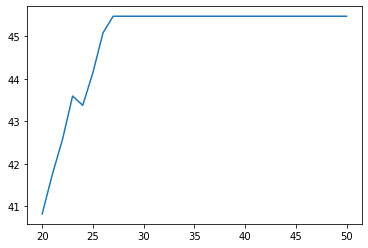

In [11]:
import matplotlib.pyplot as plot
Rs = list(range(20, 50 + 1))
FNs = []
for R in Rs:
    weights, factors, recErrors = ll.llDecomposition.CP(annots['A'], rank=R)
    reA = ll.llDecomposition.recTensor(weights, factors)
    FNs.append(FrobeniusNorm(annots['A'], reA))
plot.plot(Rs, FNs)